# Dataset 1: AirBnB Open Data from Seattle 
1. **Problem 1:** What factors affect pricing
2. **Problem 2:** What  factors affect being a superhost
3. **Problem 3:** When and where are the best time to visit seattle based on airbnb prices

## Structure of this mini project
1. Brief look at the datasets we are working with
2. Data Preparation: Cleaning the Datasets
3. Prob 1: Exploratory analysis
4. Prob 1: Using machine learning to solve
5. Prob 2: Exploratory analysis
6. Prob 2: Using machine learning to solve
7. Prob 3: Data cleaning
8. Prob 3: Exploratory analysis
9. Prob 3: Using machine learning to solve


In [67]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.stats.mstats import winsorize
import folium

In [68]:
# Importing the datasets
df_listings = pd.read_csv("listings.csv")
df_calendar = pd.read_csv('calendar.csv')

# A brief look into the 2 datasets listing.csv and calendar.csv

**Dataset - listings.csv**

In [3]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
# Checking for NaN data in lisitings.csv
df_listings.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

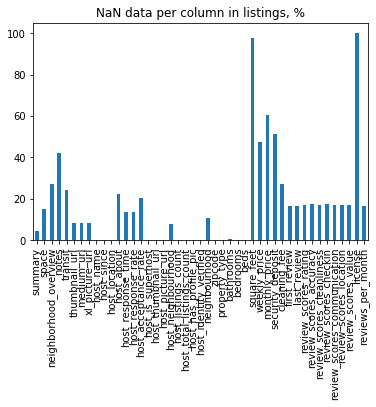

In [5]:
# Finding the percentage of NaN data for each column in listings.csv
df_listings_nan = df_listings.isna().mean()*100

# Filtering out column with NaN data
df_listings_columns = df_listings_nan[df_listings_nan > 0]

# Plotting the results
df_listings_columns.plot.bar(title='NaN data per column in listings, %')

As seen from the plot, we can clearly identify features with more than 60% of NaN data. 
<br> **"square-feet"** and **"license"** should therefore be omitted to ensure that our analysis will not be skewed or biased due to lack of data. 

In consideration of the percentages of NaN data in each column in the dataset, we choose to focus on the following features:
<br> **"cleaning_fee", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
"review_scores_location", "number_of_reviews", "calculated_host_listings_count", "host_response_rate", "host_acceptance_rate",
"host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "beds", "last_review", "host_response_time", "host_since", "host_has_profile_pic", "host_identity_verified", "host_is_superhost", "instant_bookable", "cancellation_policy", "guests_included", "price"**                          

In [6]:
# Make a dataframe out of variables we are interested
df_interest= pd.DataFrame(df_listings[["cleaning_fee","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                                       "review_scores_communication","review_scores_location"
                                         ,"number_of_reviews","host_response_rate",
                                       "host_total_listings_count","accommodates"
                                         ,"bathrooms","bedrooms","beds","last_review",
                                       "host_response_time","host_since","host_has_profile_pic","minimum_nights",
                                    "host_identity_verified","instant_bookable","cancellation_policy"
                                       ,"guests_included","reviews_per_month","extra_people", "price","host_is_superhost"]])
df_interest.head()

cleaning_fee  review_scores_accuracy  review_scores_cleanliness  \
0          NaN                    10.0                       10.0   
1       $40.00                    10.0                       10.0   
2      $300.00                    10.0                       10.0   
3          NaN                     NaN                        NaN   
4      $125.00                     9.0                        9.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                    NaN                          NaN                     NaN   
4                   10.0                         10.0                     9.0   

   number_of_reviews host_response_rate  host_total_listings_count  \
0                207                96%                        3.0   
1                 43                98%                        6.0   
2                 20                67%                        2.0   
3                  0                NaN                        1.0   
4                 38               100%                        2.0   

   accommodates  ...  host_has_profile_pic  minimum_nights  \
0             4  ...                     t               1   
1             4  ...                     t               2   
2            11  ...                     t               4   
3             3  ...                     t               1   
4             6  ...                     t               1   

   host_identity_verified instant_bookable cancellation_policy  \
0                       t                f            moderate   
1                       t                f              strict   
2                       t                f              strict   
3                       t                f            flexible   
4                       t                f              strict   

  guests_included reviews_per_month  extra_people    price host_is_superhost  
0               2              4.07         $5.00   $85.00                 f  
1               1              1.48         $0.00  $150.00                 t  
2              10              1.15        $25.00  $975.00                 f  
3               1               NaN         $0.00  $100.00                 f  
4               6              0.89        $15.00  $450.00                 f  

[5 rows x 26 columns]

In [7]:
# knowing the type of data we are working with
df_interest.dtypes

cleaning_fee                    object
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
number_of_reviews                int64
host_response_rate              object
host_total_listings_count      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
last_review                     object
host_response_time              object
host_since                      object
host_has_profile_pic            object
minimum_nights                   int64
host_identity_verified          object
instant_bookable                object
cancellation_policy             object
guests_included                  int64
reviews_per_month              float64
extra_people                    object
price                           object
host_is_superhost        

# Data Preparation
2 datasets to prepare:
>1. listings.csv
2. calendar.csv

Observations and steps to prepare
>1. remove $ , % sign 
2. Numeric variables are wrongly assigned as objects 
   * cast them as floats
3. Replacing NaN values with mean
4. Ordinal variables are wrongly assigned as objects (cancellation_policy, last_review, host_since)
   * convert dates to no. of days as host
   * convert cancellation_policy, host_response_time to numeric values: 1,2,3,4...
5. Binary variables must be converted to numerical variables to be used in regression model
   * host_has_profile_pic, host_identity_verified, host_is_superhost, instant_bookable
   * They are all True False values

In [8]:
# function for converting cancellation policy (ordinal) to numerical data
def make_numeric_cancellation_policy(x):
    if(x=="strict"):
        x = 1
    elif(x=="moderate"):
        x=2
    elif(x=="flexible"):
        x=3
    return x


df_interest.cancellation_policy=df_interest.cancellation_policy.apply(lambda x: make_numeric_cancellation_policy(x))

In [9]:
#make host_response_time (ordinal) into numeric
def make_numeric(x):
    if(x=="within an hour"):
        x = 4
    elif(x=="within a few hours"):
        x=3
    elif(x=="within a day"):
        x=2
    elif(x=="a few days or more"):
        x=1
    return x

#change the string data in the column to numerical
df_interest.host_response_time = df_interest.host_response_time.apply(lambda x: make_numeric(x))

In [10]:
#convert host_since from date to number of days since the latest day
from datetime import date

# convert_no_od_days converts  string in data to a datetime object of format "2016-12-14"
def convert_no_of_days(x):
    if pd.isnull(x):
        return None
    else:
        x = dt.strptime(x,"%Y-%m-%d")
        return x

df_interest.host_since = df_interest.host_since.apply(lambda x: convert_no_of_days(x))

# max_date is the latest date in host_since column
df_example = df_interest.copy()
max_date = max(df_example.host_since)

# change the datetime object of the column to show the no. of days as a host
# assumption: host_since is earlier is better, no. of days as host larger means better
df_interest.host_since = df_interest.host_since.apply(lambda x: (max(df_example.host_since)-x).days)

In [11]:
#convert last_review from date to number of days since max day
# assumption last_review is more recent the better
def convert_no_of_days(x):
    if pd.isnull(x):
        return None
    else:
        x = dt.strptime(x,"%Y-%m-%d")
        return x

df_interest.last_review = df_interest.last_review.apply(lambda x: convert_no_of_days(x))

df_example = df_interest.copy()
max_date = max(df_example.last_review)

df_interest.last_review = df_interest.last_review.apply(lambda x: (max(df_example.last_review)-x).days)

In [12]:
#clean all the $ , % signs, ignore the na values
def clean_dollars(x):
    if pd.isnull(x):
        return None
    else:
        x = x.lstrip('$')
        x = x.replace(",","")
        return float(x)
def clean_percentage(x):
    if pd.isnull(x):
        return None
    else:
        x = x.rstrip('%')
        x = float(x)
        return x
    
#apply clean_dollars to 3 columns cleaning fee,price, host response rate and extra people column
df_interest.cleaning_fee = df_interest.cleaning_fee.apply(lambda x: clean_dollars(x))
df_interest.price = df_interest.price.apply(lambda x: clean_dollars(x))
df_interest.host_response_rate = df_interest.host_response_rate.apply(lambda x: clean_percentage(x))
df_interest.extra_people = df_interest.extra_people.apply(lambda x: clean_dollars(x))

In [13]:
#function to make all t,f values 1 and 0
def make_tf_integer(x):
    if(x=="f"):
        x=0
    elif(x=="t"):
        x=1
    return x
#apply for all columns
for column in df_interest:
    df_interest[column]=df_interest[column].apply(lambda x: make_tf_integer(x))  


In [14]:
df_interest = df_interest[df_interest.guests_included != 0]
df_interest["price"] = df_interest["price"]/df_interest["guests_included"]

In [15]:
df_interest.isna().sum()

cleaning_fee                   1007
review_scores_accuracy          651
review_scores_cleanliness       646
review_scores_checkin           651
review_scores_communication     644
review_scores_location          648
number_of_reviews                 0
host_response_rate              516
host_total_listings_count         2
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
last_review                     620
host_response_time              516
host_since                        2
host_has_profile_pic              2
minimum_nights                    0
host_identity_verified            2
instant_bookable                  0
cancellation_policy               0
guests_included                   0
reviews_per_month               620
extra_people                      0
price                             0
host_is_superhost                 2
dtype: int64

### Data Preparation - Replacing NaN values from the df_interest with mean

In [16]:
#using an inputer to replace all nan values inselected columns with mean
from sklearn.impute import SimpleImputer
columns_to_input=["cleaning_fee","host_response_rate","price","extra_people","review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication"
                  ,"review_scores_location","reviews_per_month","host_since","last_review","host_response_time"]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_interest[columns_to_input])
df_interest[columns_to_input] = imputer.transform(df_interest[columns_to_input])

### Data Preparation -  Using Winsorization to remove outliers from price (response variable) and predictors 

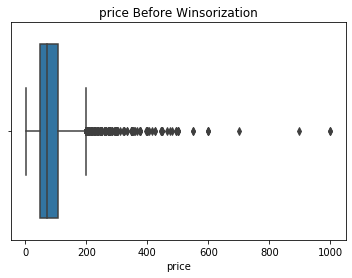

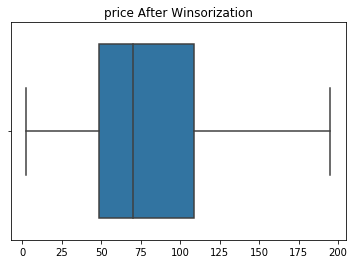

In [17]:
name = "price"
data = df_interest[name]

sb.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

winsorized_data = winsorize(data,(0,0.08))

sb.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

df_interest[name] = winsorized_data

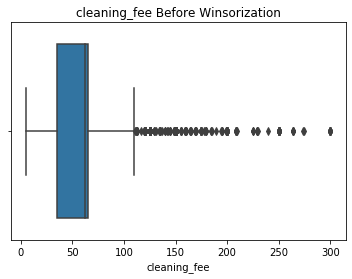

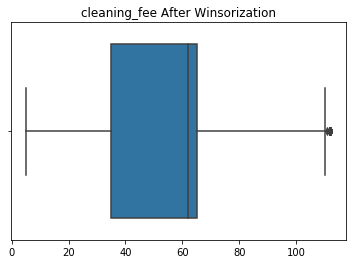

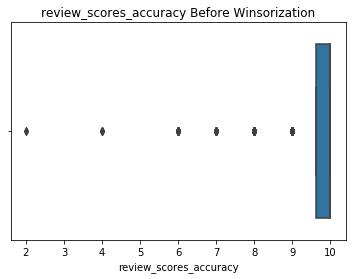

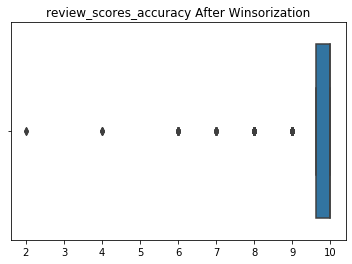

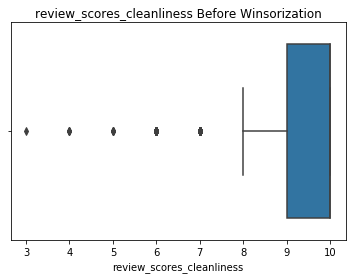

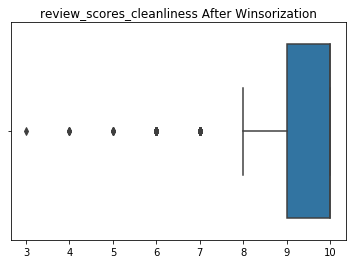

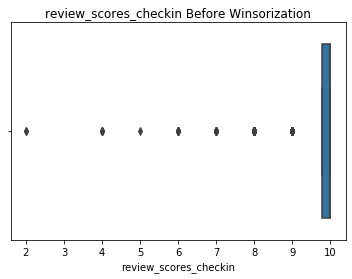

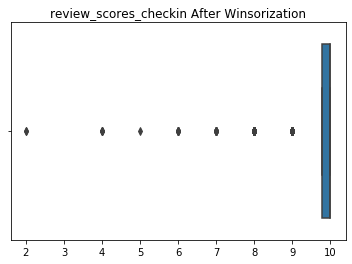

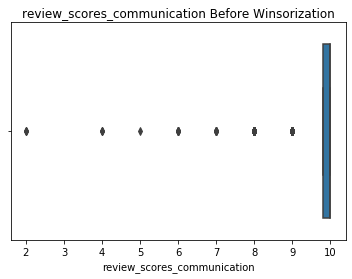

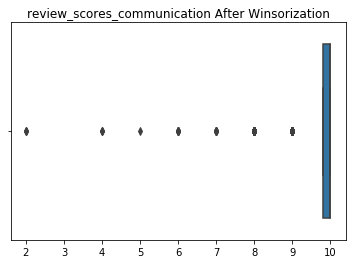

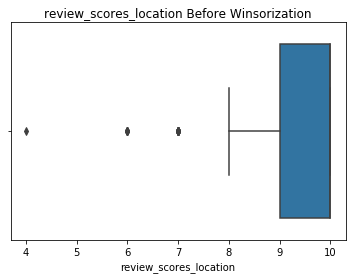

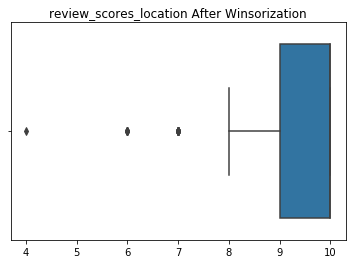

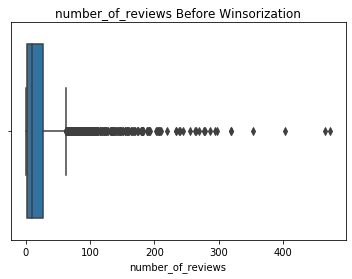

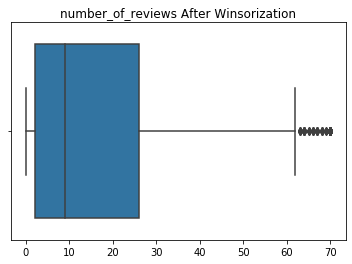

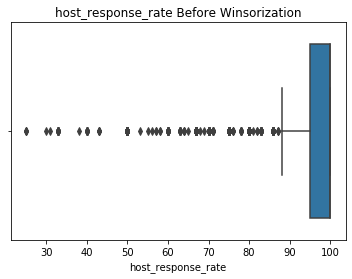

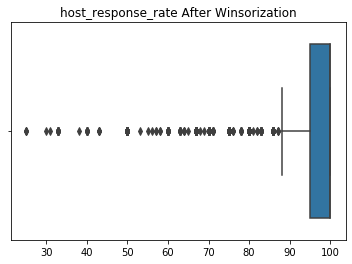

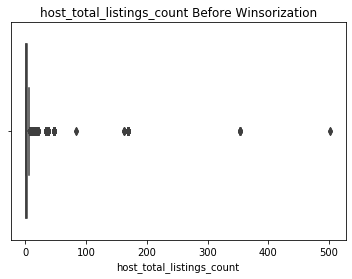

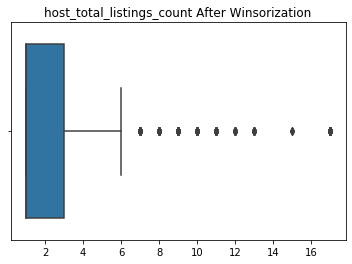

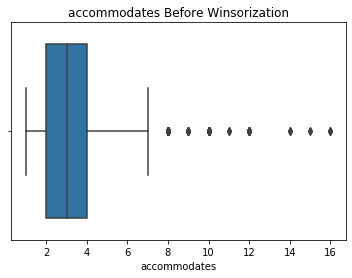

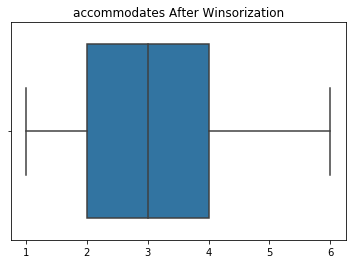

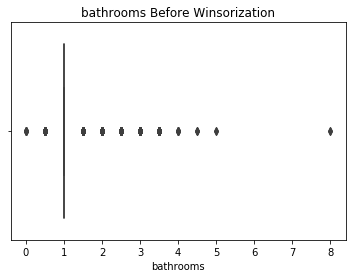

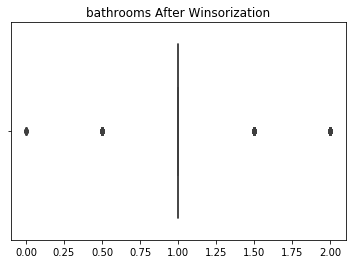

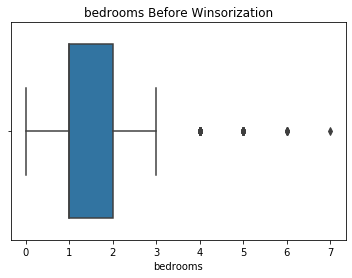

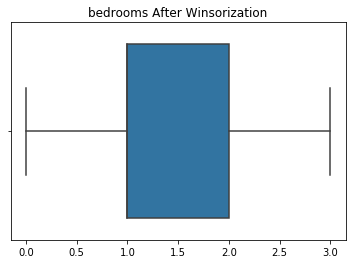

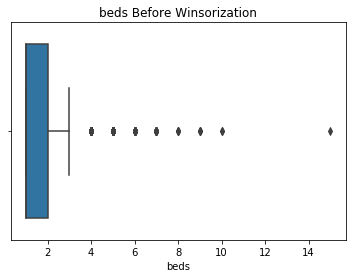

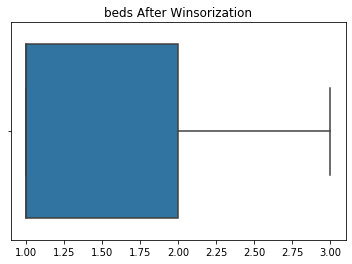

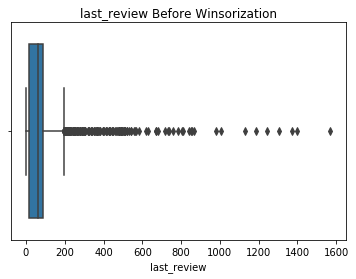

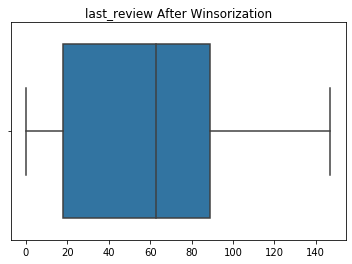

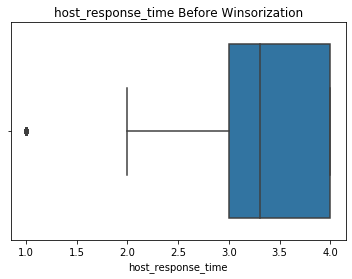

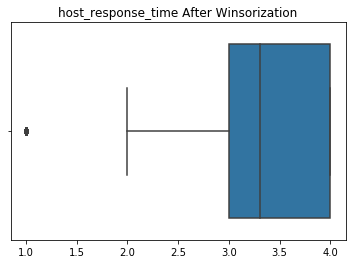

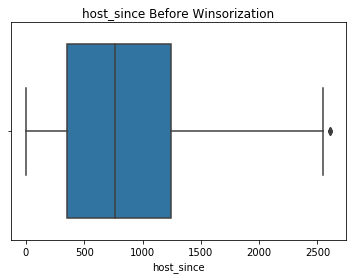

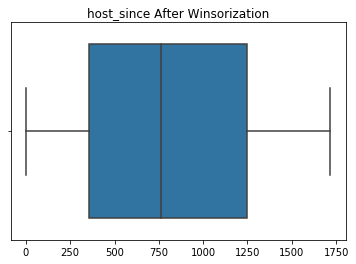

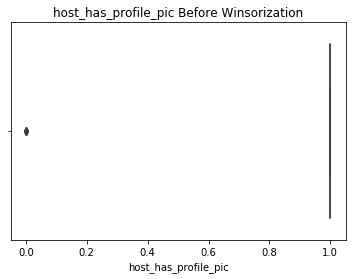

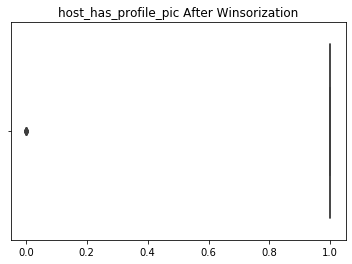

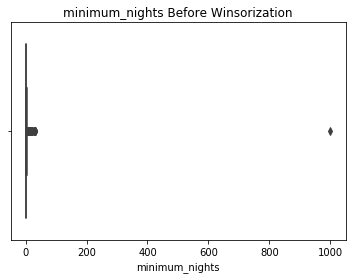

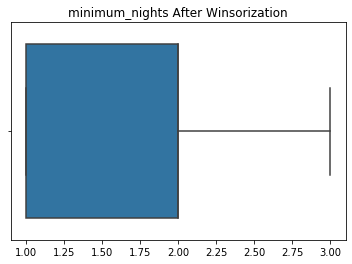

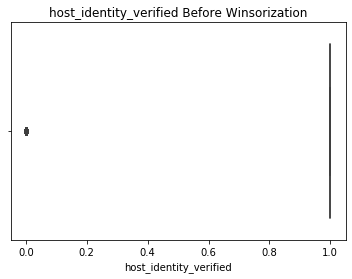

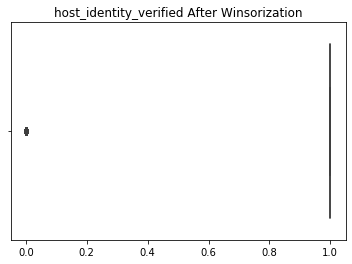

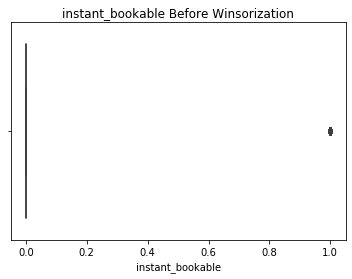

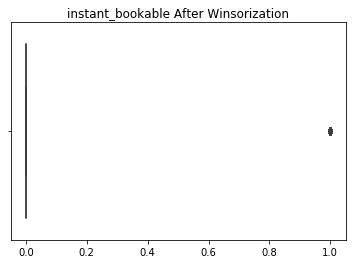

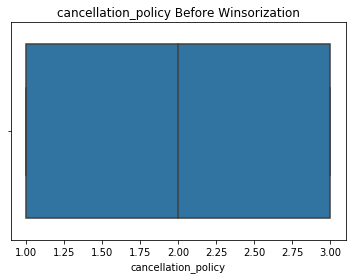

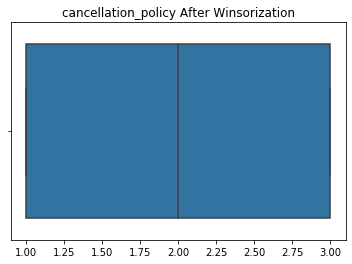

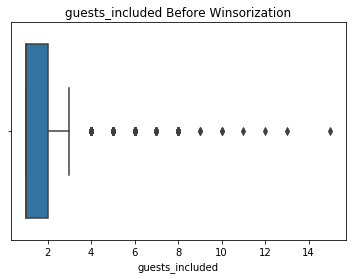

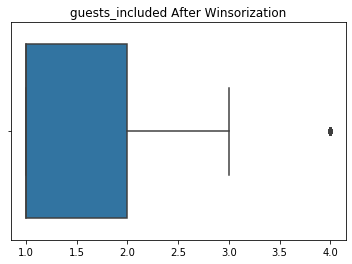

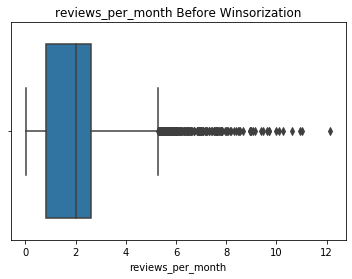

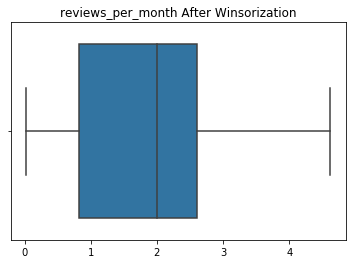

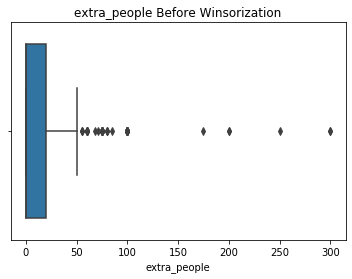

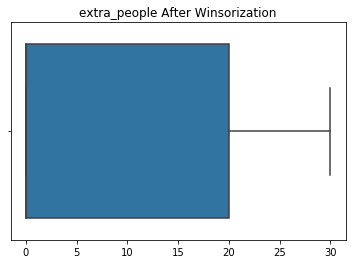

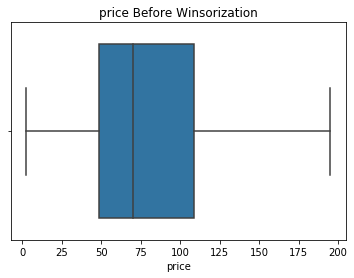

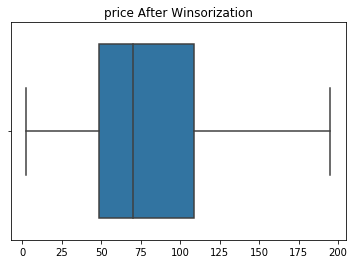

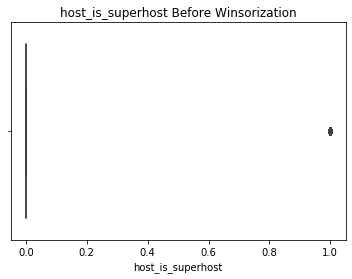

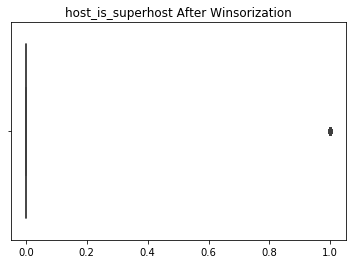

In [18]:
predictors_winsor = pd.DataFrame(df_listings[["cleaning_fee","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                                       "review_scores_communication","review_scores_location"
                                         ,"number_of_reviews","host_response_rate",
                                       "host_total_listings_count","accommodates"
                                         ,"bathrooms","bedrooms","beds","last_review",
                                       "host_response_time","host_since","host_has_profile_pic","minimum_nights",
                                    "host_identity_verified","instant_bookable","cancellation_policy"
                                       ,"guests_included","reviews_per_month","extra_people", "price","host_is_superhost"]])
for var in predictors_winsor:
    name = var
    data = df_interest[name]

    sb.boxplot(data)
    plt.title("{} Before Winsorization".format(name))
    plt.show()

    winsorized_data = winsorize(data,(0,0.08))

    sb.boxplot(winsorized_data)
    plt.title("{} After Winsorization".format(name))
    plt.show()

    df_interest[name] = winsorized_data

In [19]:
df_interest.dtypes

cleaning_fee                   float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
number_of_reviews                int64
host_response_rate             float64
host_total_listings_count      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
last_review                    float64
host_response_time             float64
host_since                     float64
host_has_profile_pic           float64
minimum_nights                   int64
host_identity_verified         float64
instant_bookable                 int64
cancellation_policy              int64
guests_included                  int64
reviews_per_month              float64
extra_people                   float64
price                          float64
host_is_superhost        

In [20]:
df_interest.isna().sum()

cleaning_fee                   0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
number_of_reviews              0
host_response_rate             0
host_total_listings_count      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
last_review                    0
host_response_time             0
host_since                     0
host_has_profile_pic           0
minimum_nights                 0
host_identity_verified         0
instant_bookable               0
cancellation_policy            0
guests_included                0
reviews_per_month              0
extra_people                   0
price                          0
host_is_superhost              0
dtype: int64

# Prob 1 exploratory analysis - Using heatmap to find correlation

### Using boxplots to visualise data

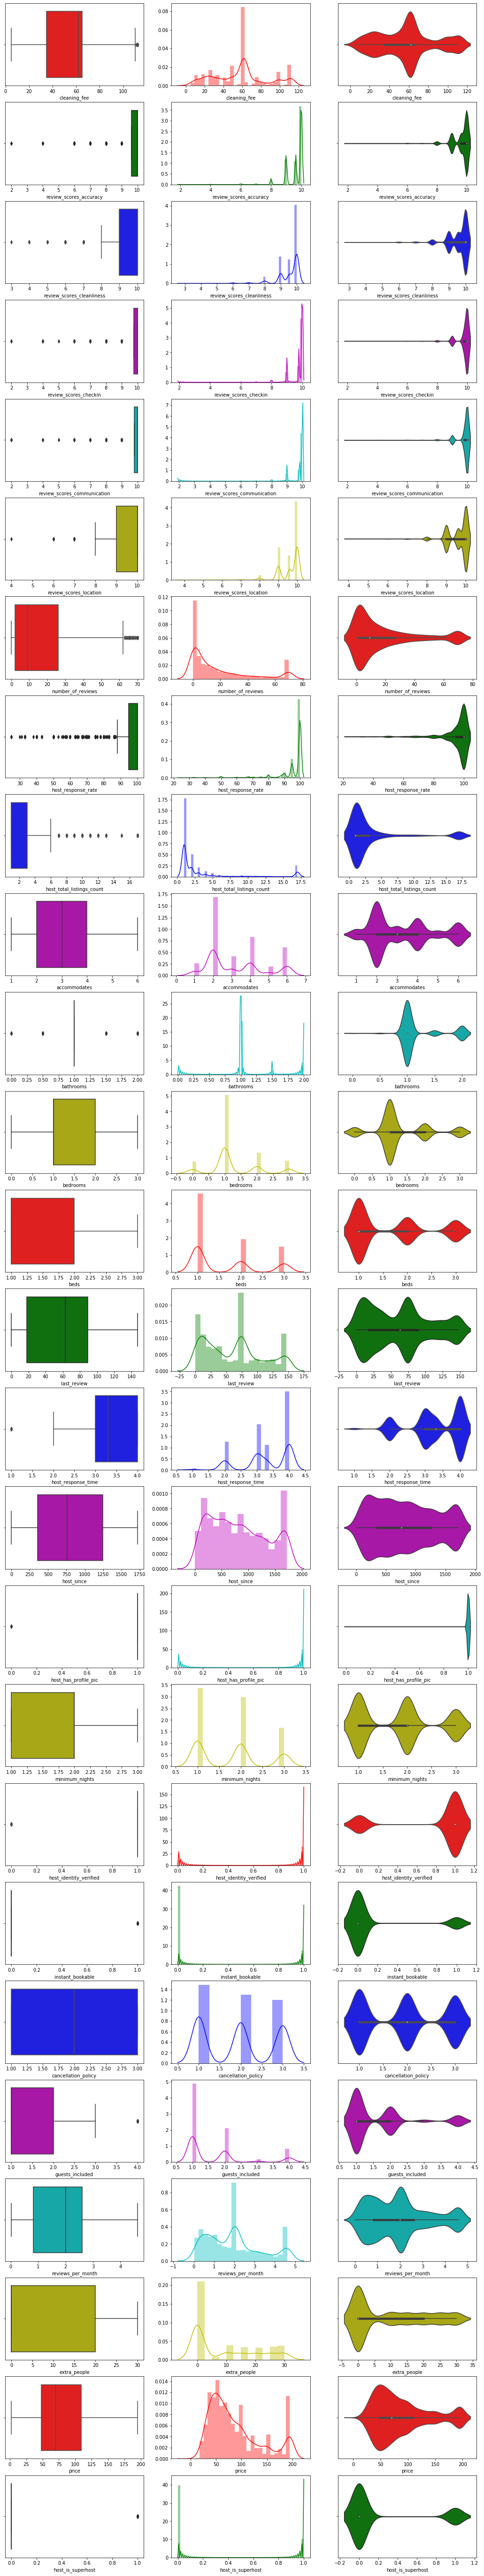

In [21]:
# Draw the distributions of all variables
f, axes = plt.subplots(len(df_interest.columns), 3, figsize=(18, 100))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for column in df_interest.columns:
    colour_count = count%6
    sb.boxplot(df_interest[column], orient = "h", color = colors[colour_count], ax = axes[count,0])
    sb.distplot(df_interest[column], color = colors[colour_count], ax = axes[count,1])
    sb.violinplot(df_interest[column], color = colors[colour_count], ax = axes[count,2])
    count += 1

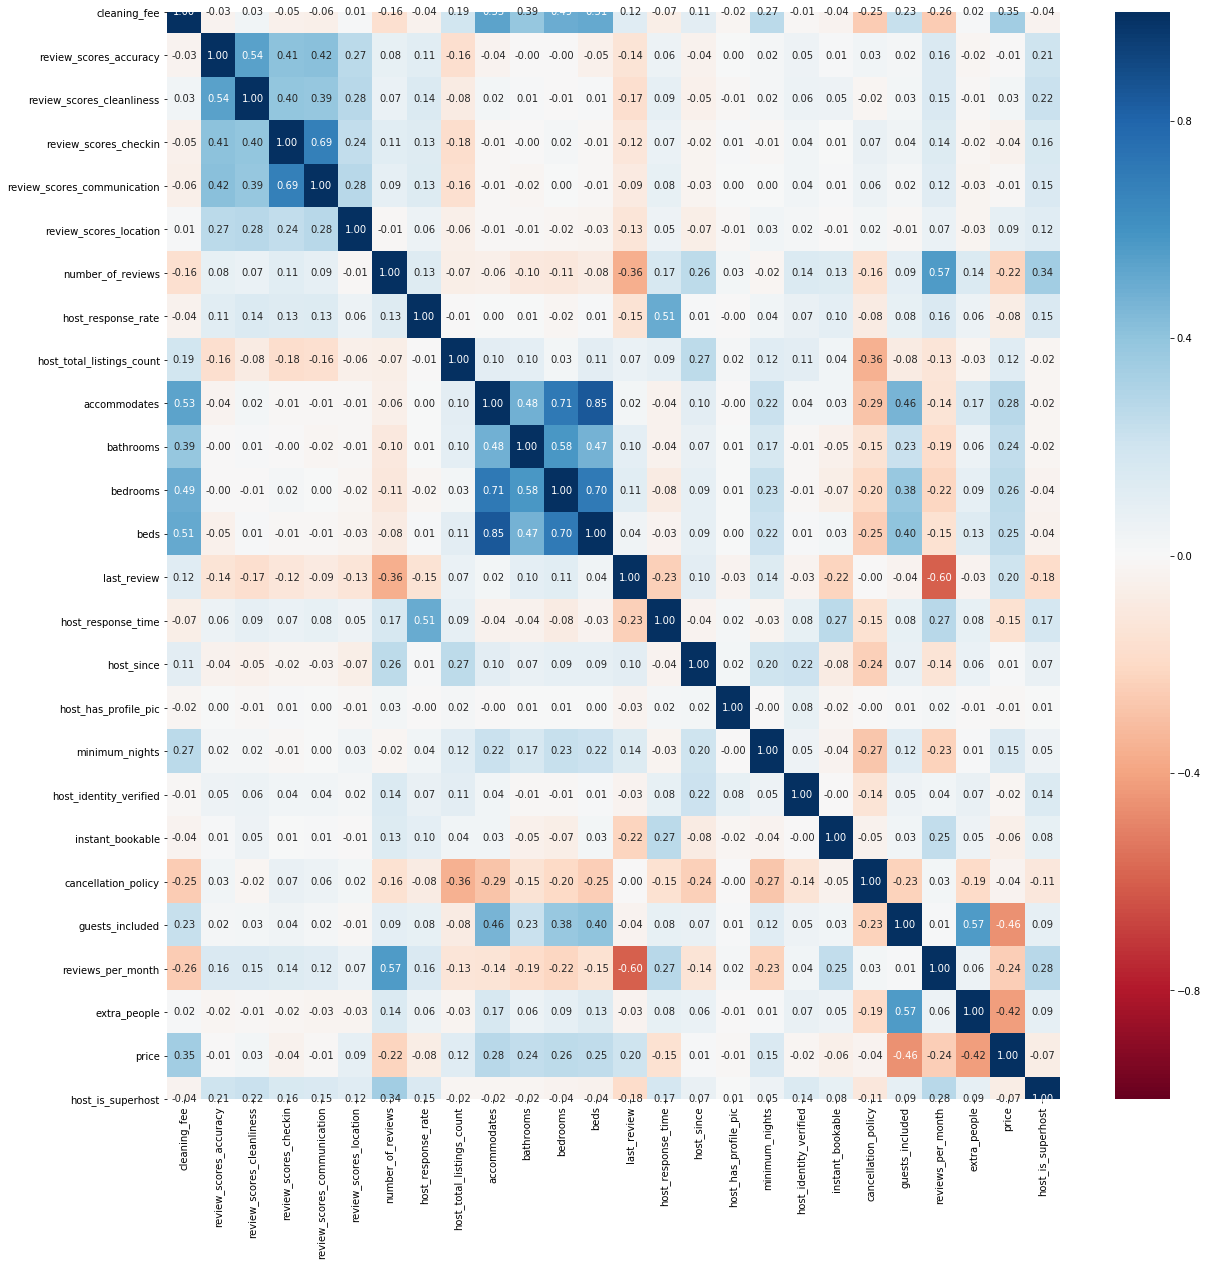

In [22]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(df_interest.corr(), vmin = -1, vmax = 1,
           annot = True, fmt = ".2f", cmap = "RdBu")

**We can tell that the variables with the highest Linear Correlation to price are:**
1. Extra_people: -0.42
2. Cleaning fee: 0.35
3. accomodates: 0.28
4. Bedrooms: 0.26
5. Beds : 0.25

**Other interesting correlations are:**
* Beds with accomodates:0.85
* Bedrooms with beds :0.70
* Accomodates with bedrroms:0.71
* Bathrooms with bedrooms:0.58


# Prob 1 Machine learning - Applying a Linear Regression Model to the data

In [23]:
x = pd.DataFrame(df_interest[["cleaning_fee","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                                       "review_scores_communication","review_scores_location"
                                         ,"number_of_reviews","host_response_rate",
                                       "host_total_listings_count","accommodates"
                                         ,"bathrooms","bedrooms","beds","last_review",
                                       "host_response_time","host_since","host_has_profile_pic","minimum_nights",
                                    "host_identity_verified","instant_bookable","cancellation_policy",
                              "guests_included","reviews_per_month","extra_people","host_is_superhost"]])
y= df_interest["price"]

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=55)

linreg = LinearRegression()
linreg.fit(x_train,y_train)
rfe = RFE(linreg, 28)
rfe = rfe.fit(x, y)
# print summaries for the selection of attributes
print(rfe.ranking_)
#since rfe ranking is all 1s we can see that all the features are equally important to price predic

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
print("Classification accuracy of model: ",linreg.score(x_train,y_train))

Classification accuracy of model:  0.6145371311677772


In [26]:
linreg.coef_

array([ 3.23307481e-01,  5.32384813e-01,  1.80723631e+00, -3.13340809e+00,
        1.18396381e-01,  7.49692339e+00, -7.04032908e-02,  9.46110782e-02,
       -3.97291457e-01,  1.31072341e+01,  8.36530919e+00,  4.92017828e+00,
       -7.72122579e-01,  1.36346931e-01, -2.68168058e+00, -2.64751498e-03,
        1.71750468e+01,  1.76470150e+00,  2.86066516e+00,  1.21903713e+00,
       -2.26712310e+00, -3.50281973e+01, -3.55385537e-01, -4.74070846e-01,
        4.17582026e+00])

In [27]:
linreg_variable_importance = pd.Series(linreg.coef_,index = x_train.columns)

In [28]:
linreg_variable_importance.sort_values(ascending=False)

host_has_profile_pic           17.175047
accommodates                   13.107234
bathrooms                       8.365309
review_scores_location          7.496923
bedrooms                        4.920178
host_is_superhost               4.175820
host_identity_verified          2.860665
review_scores_cleanliness       1.807236
minimum_nights                  1.764702
instant_bookable                1.219037
review_scores_accuracy          0.532385
cleaning_fee                    0.323307
last_review                     0.136347
review_scores_communication     0.118396
host_response_rate              0.094611
host_since                     -0.002648
number_of_reviews              -0.070403
reviews_per_month              -0.355386
host_total_listings_count      -0.397291
extra_people                   -0.474071
beds                           -0.772123
cancellation_policy            -2.267123
host_response_time             -2.681681
review_scores_checkin          -3.133408
guests_included 

**Top 6  features that increase price is**
1. host_has_profile_pic
2. accommodates
3. bathrooms
4. review_scores_location
5. bedrooms
6. host_is_superhost

# Prob 2 - Exploratory analysis

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_interest.describe()

cleaning_fee  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  number_of_reviews  host_response_rate  host_total_listings_count  accommodates    bathrooms     bedrooms         beds  last_review  host_response_time   host_since  host_has_profile_pic  minimum_nights  host_identity_verified  instant_bookable  cancellation_policy  guests_included  reviews_per_month  extra_people        price  host_is_superhost
count   3726.000000             3726.000000                3726.000000            3726.000000                  3726.000000             3726.000000        3726.000000         3726.000000                3726.000000   3726.000000  3726.000000  3726.000000  3726.000000  3726.000000         3726.000000  3726.000000           3726.000000     3726.000000             3726.000000       3726.000000          3726.000000      3726.000000        3726.000000   3726.000000  3726.000000        3726.000000
mean      57.442148                9.635772                   9.556169               9.783740                     9.808241                9.607212          17.876275           94.886604                   3.240741      3.203167     1.196860     1.281535     1.615405    60.982303            3.303738   816.885578              0.998121        1.786098                0.784756          0.151369             1.928878         1.615942           1.930221      9.138755    85.302851           0.203972
std       28.614147                0.635434                   0.728017               0.546173                     0.521142                0.574192          21.753753           10.890778                   4.543276      1.552586     0.390612     0.773672     0.782678    45.869318            0.744168   522.811499              0.043309        0.763341                0.411047          0.358456             0.817945         0.945979           1.318233     10.971216    49.096973           0.403003
min        5.000000                2.000000                   3.000000               2.000000                     2.000000                4.000000           0.000000           25.000000                   1.000000      1.000000     0.000000     0.000000     1.000000     0.000000            1.000000     0.000000              0.000000        1.000000                0.000000          0.000000             1.000000         1.000000           0.020000      0.000000     2.333333           0.000000
25%       35.000000                9.635772                   9.000000               9.783740                     9.808241                9.000000           2.000000           94.886604                   1.000000      2.000000     1.000000     1.000000     1.000000    18.000000            3.000000   355.000000              1.000000        1.000000                1.000000          0.000000             1.000000         1.000000           0.820000      0.000000    48.500000           0.000000
50%       62.054064               10.000000                  10.000000              10.000000                    10.000000               10.000000           9.000000          100.000000                   1.000000      3.000000     1.000000     1.000000     1.000000    63.000000            3.303738   761.000000              1.000000        2.000000                1.000000          0.000000             2.000000         1.000000           2.000000      0.000000    70.000000           0.000000
75%       65.000000               10.000000                  10.000000              10.000000                    10.000000               10.000000          26.000000          100.000000                   3.000000      4.000000     1.000000     2.000000     2.000000    89.000000            4.000000  1248.000000              1.000000        2.000000                1.000000          0.000000             3.000000         2.000000           2.610000     20.000000   109.000000           0.000000
max      112.000000               10.000000    

##### Observations:
> 1. review scores have a mean of around 9.6 and a 25th percentile of 9
     * Customers may generally be inclined to give a high score hence its valid range is lower
2. mean price is 130, median is 106
3. accomodates mean is 3.65 median 3
4. bed rooms mean 1.3 median 1
5. host response time mean 3.4 median 4
6. cancellation policy mean 1.69 median 2

# Prob 2 Machine Learning -Using Logistic Regression

**Using Heatmap to deduce correlation between features**

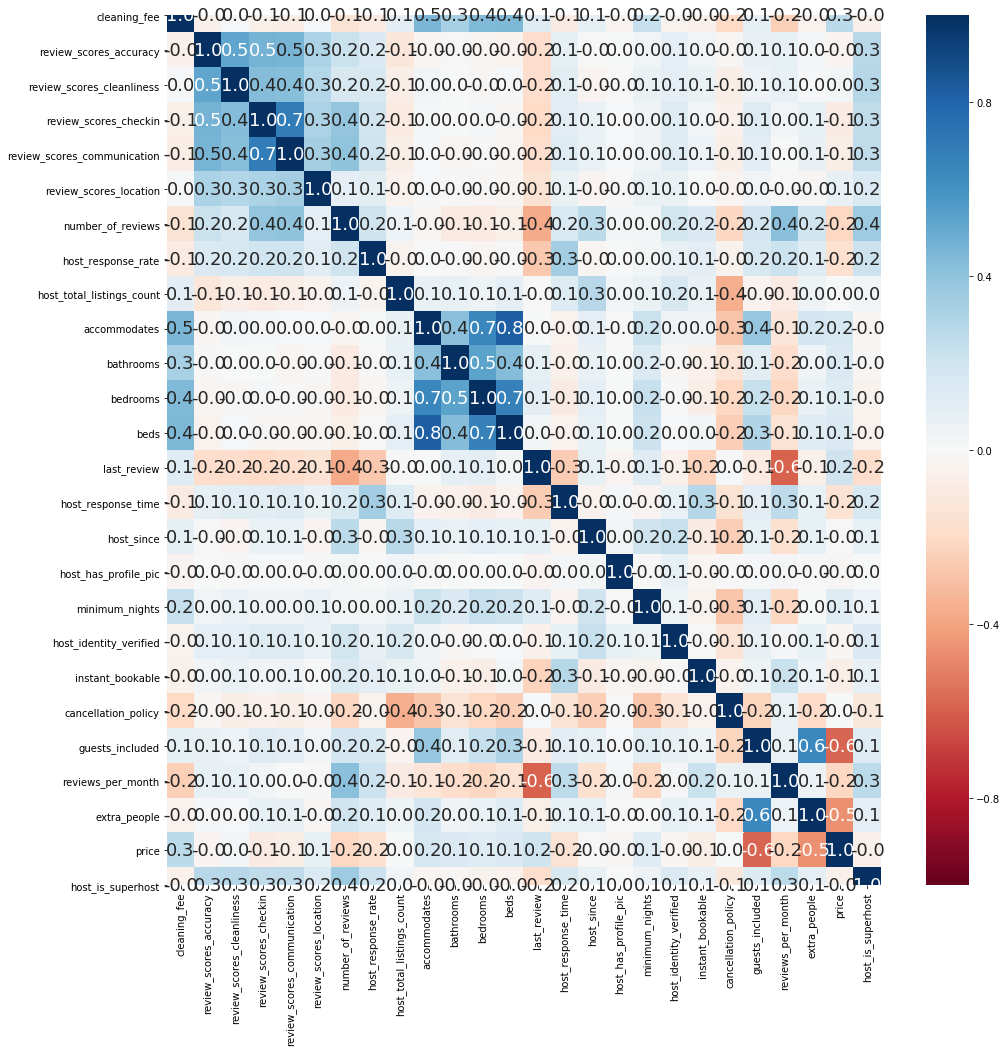

In [30]:
f,axes = plt.subplots(1,1,figsize=(16,16))
sb.heatmap(df_interest.corr(method="spearman"),annot = True, fmt = ".1f", annot_kws = {"size": 18},vmin = -1, vmax = 1, cmap = "RdBu")

### From the heatmap we can see these features have good correlation with host being a superhost:
1. review scores
2. number of reviews
3. review per month

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = pd.DataFrame(df_interest[["cleaning_fee","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                                       "review_scores_communication","review_scores_location"
                                         ,"number_of_reviews","host_response_rate",
                                       "host_total_listings_count","accommodates"
                                         ,"bathrooms","bedrooms","beds","last_review",
                                       "host_response_time","host_since","host_has_profile_pic","minimum_nights",
                                    "host_identity_verified","instant_bookable","cancellation_policy","reviews_per_month","extra_people","price"]])
y= pd.DataFrame(df_interest[["host_is_superhost"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=55)
y.shape

(3726, 1)

In [32]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

rfe = RFE(logreg, 24)
rfe = rfe.fit(x, y)
# print summaries for the selection of attributes
print(rfe.ranking_)
#since rfe ranking is all 1s we can see that all the features are equally important to price prediction

C:\Users\testi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\testi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\testi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\testi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
y_pred = logreg.predict(x_test)
print('Classification Accuracy of logistic regressor:\t' ,logreg.score(x_test, y_test))

Classification Accuracy of logistic regressor:	 0.82171581769437


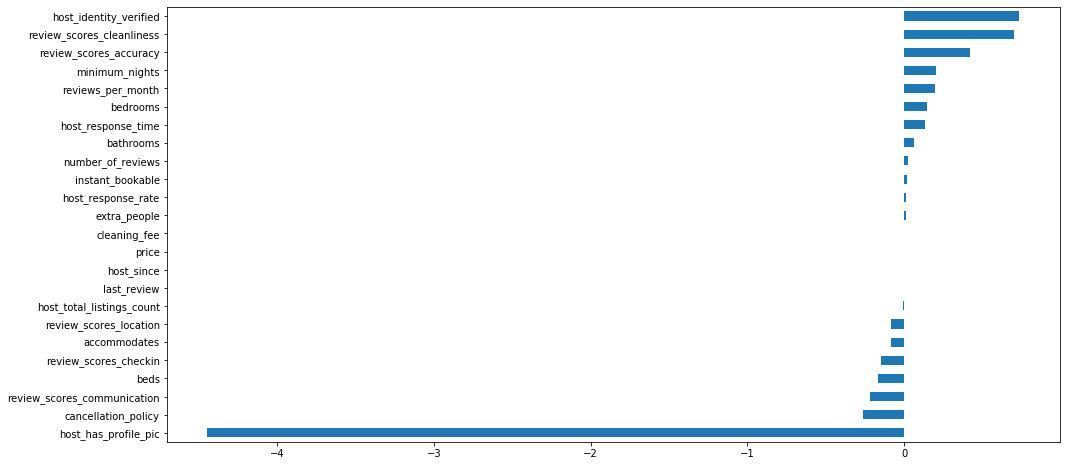

In [34]:
log_reg_variable_importance = pd.Series(logreg.coef_[0],index = x_train.columns)
log_reg_variable_importance = log_reg_variable_importance.sort_values()
f,axes  = plt.subplots(1,1,figsize =(16,8))
log_reg_variable_importance.plot(kind="barh")

In [35]:
log_reg_variable_importance

host_has_profile_pic          -4.443321
cancellation_policy           -0.261548
review_scores_communication   -0.219144
beds                          -0.164586
review_scores_checkin         -0.144932
accommodates                  -0.085258
review_scores_location        -0.083128
host_total_listings_count     -0.004952
last_review                   -0.001113
host_since                    -0.000126
price                          0.000972
cleaning_fee                   0.001288
extra_people                   0.009823
host_response_rate             0.010058
instant_bookable               0.015150
number_of_reviews              0.024465
bathrooms                      0.064438
host_response_time             0.134542
bedrooms                       0.146026
reviews_per_month              0.193846
minimum_nights                 0.204073
review_scores_accuracy         0.419942
review_scores_cleanliness      0.702253
host_identity_verified         0.732778
dtype: float64

By logistic regression the top 5 features are
1. host has profile pic - owners with no profile pic are more likely to not be superhosts
2. host_identity is verified
3. review scores cleanliness
4. review scores accuracy
5. cancellation policy

# Prob 2 Machine Learning -Using Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_model = RandomForestRegressor(n_estimators=2000, oob_score=True,random_state=55,max_features=6,max_depth=20)
rf_model.fit(x_train,y_train)

rfe = RFE(rf_model, 8)
rfe = rfe.fit(x, y)
# print summaries for the selection of attributes
print(rfe.ranking_)
#since rfe ranking is different we can see that some features predict better than others,with 1 being the highest ranking 21 being the worst


C:\Users\testi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\testi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 1  3  1 10 12  9  1  4  1  5 14 11 13  1  6  1 17  7 15 16  8  1  2  1]


In [38]:

#get the Classification accuracy and out of bag score
print("oob score: ",rf_model.oob_score_)
#0.39 is pretty bad, as nearer to 1 is good
print("Classification accuracy (train):",rf_model.score(x_train,y_train))
print("Classification accuracy (test):",rf_model.score(x_test,y_test))

oob score:  0.40727710744149426
Classification accuracy (train): 0.9160768205329302
Classification accuracy (test): 0.3563612027640164


### Which are the most important variables in the model?

In [39]:
#list of respective variable's importance
rf_model.feature_importances_

array([0.05475242, 0.04214739, 0.05709671, 0.01826486, 0.01783261,
       0.02087517, 0.15162563, 0.03208113, 0.05154092, 0.02803487,
       0.01257305, 0.01652829, 0.01386548, 0.0736771 , 0.02432346,
       0.093301  , 0.00093851, 0.02215572, 0.00910816, 0.00949958,
       0.02145874, 0.11441715, 0.03979609, 0.07410597])

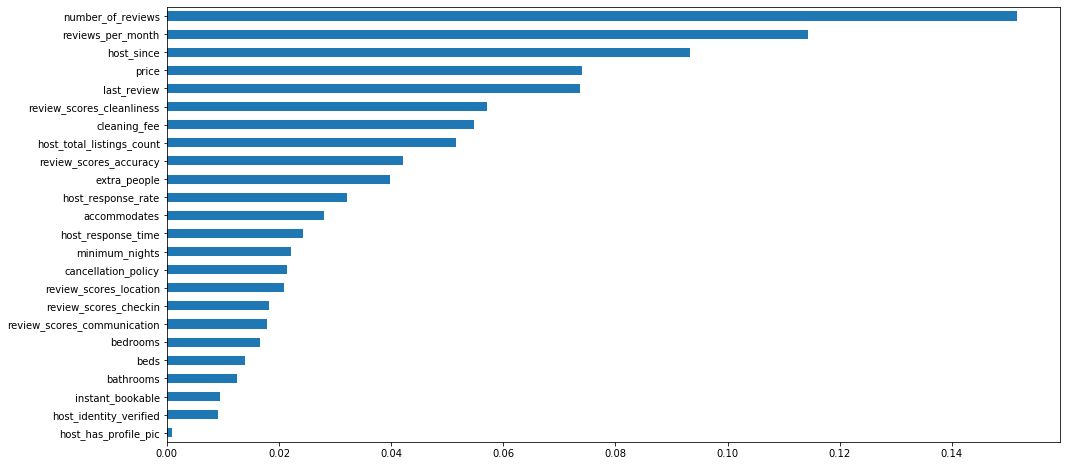

In [40]:
#visualising it and making it more comprehensive
variable_importance = pd.Series(rf_model.feature_importances_,index = x_train.columns)
variable_importance = variable_importance.sort_values()
f,axes  = plt.subplots(1,1,figsize =(16,8))
variable_importance.plot(kind="barh")

By random forest the top 6 features are
1. number of reviews
2. reviews per month
3. host since
4. review scores cleanliness
5. last review
6. price

# Prob 3 **Data cleaning**

In [69]:
#create dataframe of interest
df_where = pd.DataFrame(df_listings[["neighbourhood_group_cleansed", "price", "guests_included"]])

In [70]:
#convert price from object to float
df_where['price'].fillna('',inplace=True)
df_where['price'] = df_where['price'].map(lambda x: x.lstrip('$'))
df_where['price'] = pd.to_numeric(df_where['price'], errors='coerce')
df_where.dtypes

neighbourhood_group_cleansed     object
price                           float64
guests_included                   int64
dtype: object

On analysis of the data, there are rows where guests_include equals to 0 which does not make sense. Thus, we drop the rows with such values. 

In [71]:
df_where = df_where[df_where.guests_included != 0]

On analysis of the data, we also found out that the number of guests included is different for each listings. Thus, we choose to find the price per person.

In [72]:
#replace price with price per person
df_where["price"] = df_where["price"]/df_where["guests_included"]
df_where["price"].head()

0     42.5
1    150.0
2     97.5
3    100.0
4     75.0
Name: price, dtype: float64

# Prob 3: Preparing Calendar Dataset 

In [73]:
# Total number if NaN
df_calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

On analysis, price is NaN only when availablity is false, thus we choose to drop prices with NaN values since unavailable listings does not value add to our analysis

In [74]:
#converting price to float, drop NaN values
def cleaning_clusters(df):
    cluster=["price"]
    for column in cluster:
        df = df[df[column].notna()].replace({'\$': ''}, regex=True)
        df = df[df[column].notna()].replace({',': ''}, regex=True)
        df = df[df[column].notna()].replace({'%': ''}, regex=True)
        df[column] = df[column].apply(lambda x: float(x))
    return df
df_calendar=cleaning_clusters(df=df_calendar)

In [75]:
#check if all NaN are dropped
df_calendar.isna().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [76]:
#convert string to datetime object for values in date column
df_calendar.date = df_calendar.date.apply(lambda x: dt.strptime(x,"%Y-%m-%d"))
year = []
month = []

#make 2 columns Year and month
for rows in df_calendar.date:
    integer_year = int(dt.strftime(rows,"%Y"))
    integer_month = int(dt.strftime(rows,"%m"))
    year.append(integer_year)
    month.append(integer_month)
    
#add columns
df_calendar["year"] = year
df_calendar["month"] = month

#drop the date column
df_calendar = df_calendar.drop(columns = ["date"])

In [77]:
#count number of rows based on year
df_calendar.year.value_counts()

2016    928844
2017      5698
Name: year, dtype: int64

Observation: Year 2016 has the highest frequency, therefore we focus on this data based on 2016

In [78]:
#drop data for year 2017
df_calendar[df_calendar.year == 2016]
df_calendar.head()

listing_id available  price  year  month
0       241032         t   85.0  2016      1
1       241032         t   85.0  2016      1
9       241032         t   85.0  2016      1
10      241032         t   85.0  2016      1
14      241032         t   85.0  2016      1

There are several repeated IDs for the same month throughout the dataset hence we need to remove them.

In [79]:
df_calendar = df_calendar.drop_duplicates(subset=['listing_id', 'month'], keep='first')
df_calendar.head()

listing_id available  price  year  month
0        241032         t   85.0  2016      1
28       241032         t   85.0  2016      2
57       241032         t   85.0  2016      3
88       241032         t   85.0  2016      4
118      241032         t   85.0  2016      5

# Prob 3: Exploratory Analysis

### Dataset - calendar.csv 
####  Analysis on relationship between price and month

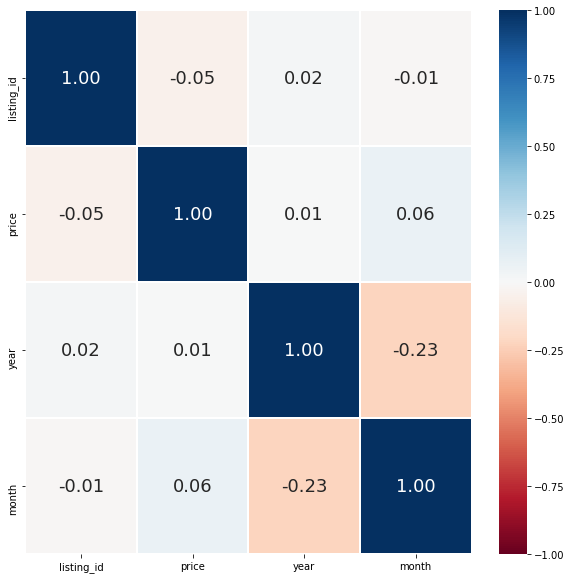

In [80]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(df_calendar.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

However, there is no strong relationship between price and month found.

#### Analysis of relation between number of monthly listings and price

In [81]:
#create dataframe with total number of listings based on month
df_calendar_count = df_calendar.listing_id.groupby([df_calendar.month]).agg({'count'})

In [82]:
group = df_calendar.groupby(["month"])

#create dataframe with average price based on month 
df_average_price = group.aggregate({"price":np.mean})

In [83]:
#combining both dataframes together
df_combined = pd.concat([df_calendar_count, df_average_price.price], axis = 1)

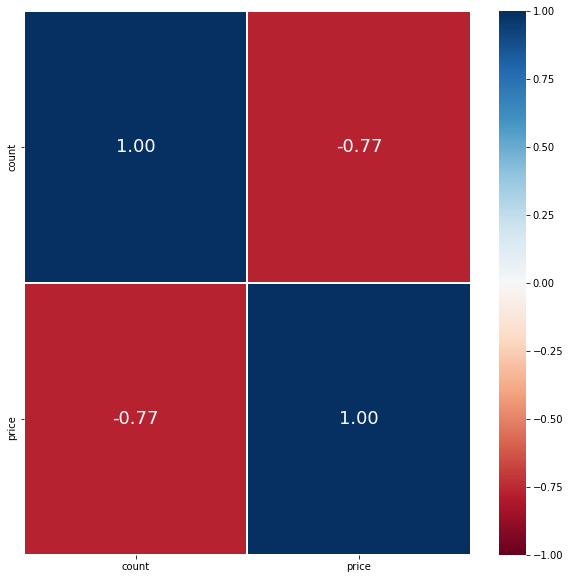

In [84]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(df_combined.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As seen, there is a relatively strong negative correlation between number of monthly listings(count) and price. When number of listings increases, the price decrease.

# Prob 3.1: When is the best time to visit seattle

In [85]:
map_visualisation = folium.Map(location=[47.6062,-122.332069],zoom_start=11)
# make a dataframe with the latitude, longitude and price
location_df = pd.DataFrame(df_listings[["latitude","longitude","price"]])


In [86]:
#make a function to clean lcoation df
def cleaning_clusters_location(df):
    cluster=["latitude","longitude","price"]
    for column in cluster:
        df = df[df[column].notna()].replace({'\$': ''}, regex=True)
        df = df[df[column].notna()].replace({',': ''}, regex=True)
        df = df[df[column].notna()].replace({'%': ''}, regex=True)
        df[column] = df[column].apply(lambda x: float(x))
    return df

location_df=cleaning_clusters_location(df=location_df)

In [87]:
#green =cheap ,blue=normal ,yellow= above average,red = expensive
color=[]
for price in location_df.price:
    
    #price under the 25th qunatile
    if( price < df_interest.price.quantile(.25)):
        color.append("green")
    #price between 25th and median
    elif(price<df_interest.price.quantile(.5)):
        color.append("blue")
    #price between median and 75th    
    elif(price<df_interest.price.quantile(.75)):
        color.append("yellow")
    #remaining
    else:
        color.append("red")
#make column for colour to show on map
location_df["colour"]=color        

In [88]:
#plot the heatmap
for a,b,c in zip(location_df.latitude, location_df.longitude,location_df.colour): 
    folium.CircleMarker(location =[a,b],radius =0.3,popup="airbnb",color=c).add_to(map_visualisation)
map_visualisation

Red: 75th percentile (expensive)<br>
Yellow: 50-75 percentile (above average)<br>
Blue: 25-50 percentile (average)<br>
Green: 0-25th percentile (cheap)<br>


Observation & Analysis:
        
> 1. There are more red dots clustered in the central area (Downtown), as well as Queen Anne
2. Airbnb's situated near the sea in West seattle has higher prices 
3. There are more blue and green options in the south of Seattle around Rainier Valley,  in the North of Seattle in areas in and around Northgate (Maple Leaf and lake city) and Delridge

In [89]:
#create a dataframe for each neighborhood
nb = ["Downtown", "Capitol Hill", "Beacon Hill", "Ballard", "Queen Anne", "Central Area", "Other neighborhoods",
      "Cascade", "Seward Park", "Rainier Valley", "Delridge", "Magnolia", "West Seattle", "Northgate", "Lake City",
      "Interbay", "University District"]
nb_Downtown = df_where[df_where['neighbourhood_group_cleansed']=='Downtown']
nb_CapitolHill = df_where[df_where['neighbourhood_group_cleansed']=='Capitol Hill']
nb_BeaconHill = df_where[df_where['neighbourhood_group_cleansed']=='Beacon Hill']
nb_Ballard = df_where[df_where['neighbourhood_group_cleansed']=='Ballard']
nb_QueenAnne = df_where[df_where['neighbourhood_group_cleansed']=='Queen Anne']
nb_CentralArea = df_where[df_where['neighbourhood_group_cleansed']=='Central Area']
nb_Otherneighborhoods = df_where[df_where['neighbourhood_group_cleansed']=='Other neighborhoods']
nb_Cascade = df_where[df_where['neighbourhood_group_cleansed']=='Cascade']
nb_SewardPark = df_where[df_where['neighbourhood_group_cleansed']=='Seward Park']
nb_RainierValley = df_where[df_where['neighbourhood_group_cleansed']=='Rainier Valley']
nb_Delridge = df_where[df_where['neighbourhood_group_cleansed']=='Delridge']
nb_Magnolia = df_where[df_where['neighbourhood_group_cleansed']=='Magnolia']
nb_WestSeattle = df_where[df_where['neighbourhood_group_cleansed']=='West Seattle']
nb_Northgate = df_where[df_where['neighbourhood_group_cleansed']=='Northgate']
nb_LakeCity = df_where[df_where['neighbourhood_group_cleansed']=='Lake City']
nb_Interbay = df_where[df_where['neighbourhood_group_cleansed']=='Interbay']
nb_UniversityDistrict = df_where[df_where['neighbourhood_group_cleansed']=='University District']

In [90]:
#create a dataframe for mean price of each neighborhoood
mapping_df = pd.DataFrame(columns = ['neighborhood', 'mean_price']) 

#find the average of each neighborhooda and append into the dataframe
mapping_df=mapping_df.append({'neighborhood' : 'Downtown', 'mean_price' : np.mean(nb_Downtown['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Capitol Hill', 'mean_price' : np.mean(nb_CapitolHill['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Beacon Hill', 'mean_price' : np.mean(nb_BeaconHill['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Ballard', 'mean_price' : np.mean(nb_Ballard['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Queen Anne', 'mean_price' : np.mean(nb_QueenAnne['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Central Area', 'mean_price' : np.mean(nb_CentralArea['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Other neighborhoods', 'mean_price' : np.mean(nb_Otherneighborhoods['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Cascade', 'mean_price' : np.mean(nb_Cascade['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Seward Park', 'mean_price' : np.mean(nb_SewardPark['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Rainier Valley', 'mean_price' : np.mean(nb_RainierValley['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Delridge', 'mean_price' : np.mean(nb_Delridge['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Magnolia', 'mean_price' : np.mean(nb_Magnolia['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'West Seattle', 'mean_price' : np.mean(nb_WestSeattle['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Northgate', 'mean_price' : np.mean(nb_Northgate['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Lake City', 'mean_price' : np.mean(nb_LakeCity['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'Interbay', 'mean_price' : np.mean(nb_Interbay['price'])}, ignore_index=True)
mapping_df=mapping_df.append({'neighborhood' : 'University District', 'mean_price' : np.mean(nb_UniversityDistrict['price'])}, ignore_index=True)

mapping_df

neighborhood  mean_price
0              Downtown  120.605143
1          Capitol Hill   97.980400
2           Beacon Hill   74.415625
3               Ballard   84.332074
4            Queen Anne  110.709965
5          Central Area   89.287477
6   Other neighborhoods   80.055147
7               Cascade  101.702247
8           Seward Park   76.392442
9        Rainier Valley   63.702724
10             Delridge   59.931818
11             Magnolia  117.598361
12         West Seattle  107.391328
13            Northgate   63.283654
14            Lake City   67.198413
15             Interbay   96.090909
16  University District   75.994145

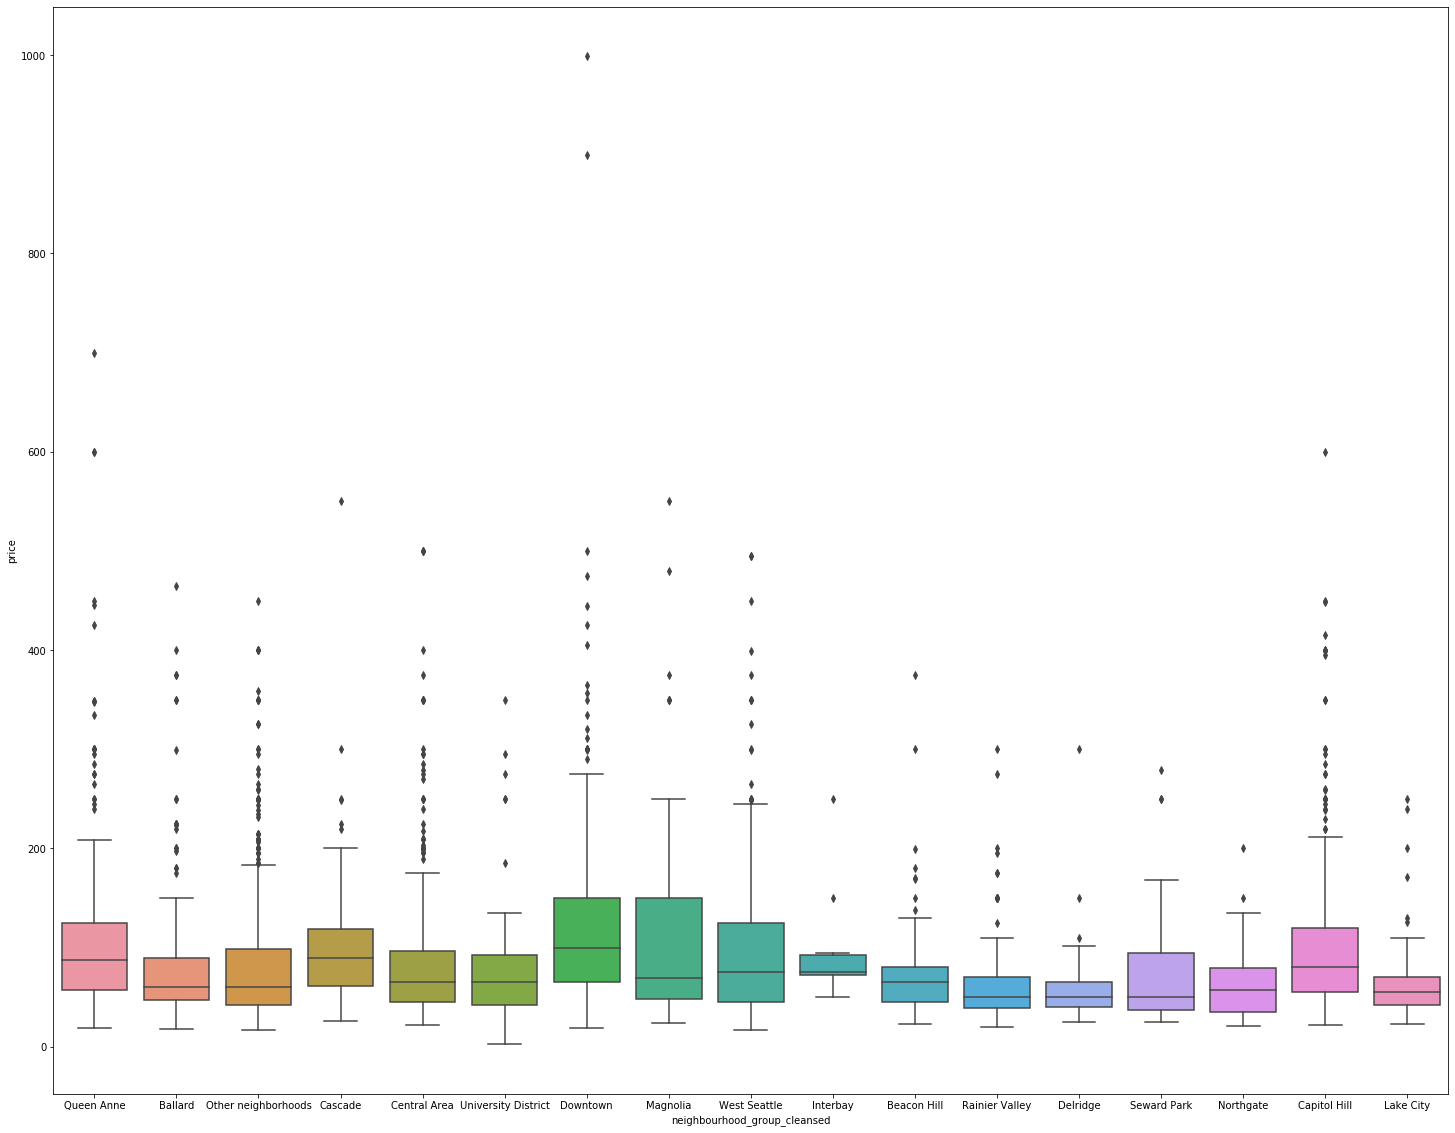

In [63]:
plt.figure(figsize=(25,20))
# visualise it in boxplot
sb.boxplot(x=df_where.neighbourhood_group_cleansed,y=df_where.price)

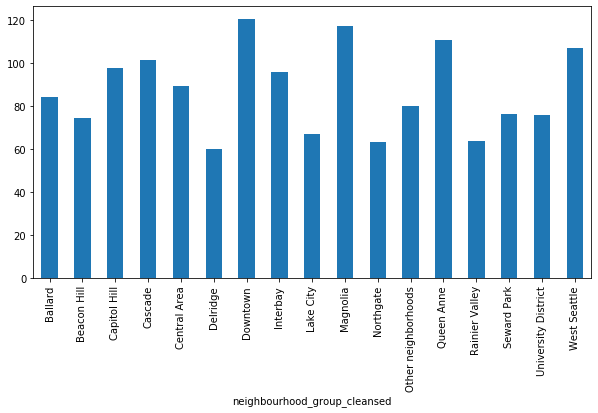

In [64]:
plt.figure(figsize=(10,5))
df_where.groupby('neighbourhood_group_cleansed').price.mean().plot(kind="bar")
plt.show()

As seen from the bar plot, the top 3 neighbourhood  to live in seattle based on price is Delridge, Rainer Valley and Northgate as they offer the lowest average price througout the year. Moreover, as seen from the boxplot, the spread of the data relatively small. 

# Prob 3.2: When is the best time to visit seattle

### Dataset - calendar.csv

#### Plotting time series for both average price and number of listings

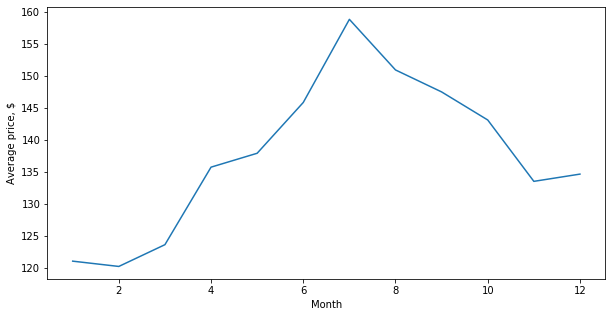

In [65]:
plt.figure(figsize=(10,5))
plt.plot(df_average_price)
plt.ylabel('Average price, $')
plt.xlabel('Month')

plt.show()

Average price is seen to be the highest in July.

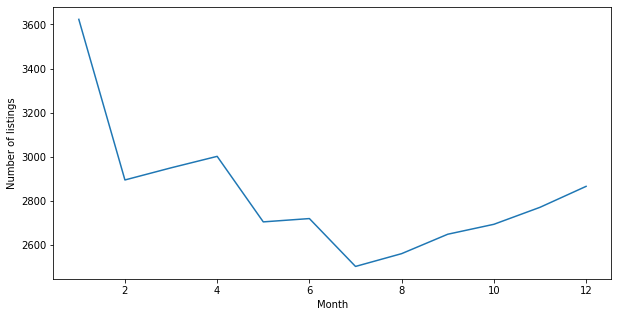

In [66]:
plt.figure(figsize=(10,5))
plt.plot(df_calendar_count)
plt.ylabel('Number of listings')
plt.xlabel('Month')

plt.show()

In July, the number of listing is the lowest. 

From both plots, we can see that January would be the best time to travel since the number of listings is the highest and consumers would have a wide variety of AirBnb housing to choose from. Moreover, the average price is found to be second lowest as seen from the first plot. In contrast, July would be the worst time to travel since average price is the highest with the lowest number of listings.